# 24788 Presentation
## Bootstrapping 

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Dataset used for this introduction

[NBA Players Stats - 2014-2015](https://www.kaggle.com/drgilermo/nba-players-stats-20142015/data)

In [2]:
nba = pd.read_csv("players_stats.csv").dropna().reset_index(drop=True)

In [3]:
nba.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


In [4]:
nba_height = nba.Height

### Randomly select 40 data points to be our original sample

In [5]:
original = nba_height[np.random.randint(0,len(nba_height),40)].reset_index(drop=True)

In [6]:
original.head(10)

0    202.5
1    202.5
2    202.5
3    202.5
4    202.5
5    210.0
6    185.0
7    192.5
8    192.5
9    202.5
Name: Height, dtype: float64

In [7]:
means = []
means.append(original.mean())

### Iterate for 1000 times

In [8]:
while len(means)<1000:
    sample = original[np.random.randint(0,len(original),40)]
    means.append(sample.mean())

### Plot Bootstrap Distribution

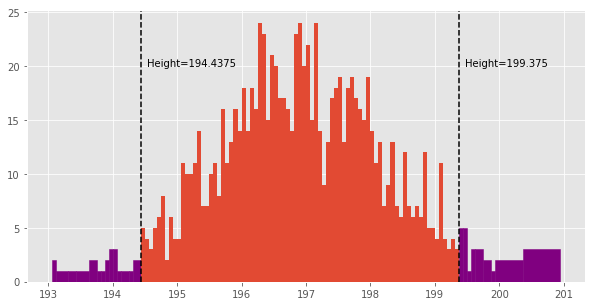

In [9]:
plt.figure(figsize=(10,5))
values,bins,p = plt.hist(means,bins=sorted(set(means)))
s = 0
pre = []
post = []
out = []
for i,n in enumerate(values):
    s+=n
    if s<0.025*sum(values) or s>0.975*sum(values):
        out.append(i)
        p[i].set_color('purple')

for i in range(len(out)):
    if i > 0:
        if out[i]-out[i-1]!=1:
            plt.axvline(bins[i], color="k", linestyle="--")
            plt.text(bins[i]+0.1,20,'Height='+str(bins[i]))
            plt.axvline(bins[out[i]], color="k", linestyle="--")
            plt.text(bins[out[i]]+0.1,20,'Height='+str(bins[out[i]]))
plt.show()

In [10]:
print(nba_height.mean())
print(np.mean(means))

196.5857142857143
196.868875
